### STEP 1: EXTRACTING DATA FROM DATABASE
SQL QUERY
1. select year,avg_temp from city_data where country='India'  and city='Hyderabad'
2. select * from global_data

### *Tools Used
Language: Python
Libraries: Pandas, numpy, matplotlib, seaborn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [4]:
global_data= pd.read_csv("global_data.csv")
hyderabad=pd.read_csv("hyderabad_data.csv")

In [5]:
global_data.head(1)


,year,avg_temp
0,1750,8.72


In [6]:
hyderabad.head(1)

,year,avg_temp
0,1796,26.53


In [7]:
global_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      266 non-null    int64  
 1   avg_temp  266 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


In [8]:
hyderabad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      218 non-null    int64  
 1   avg_temp  211 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.5 KB


In [9]:
global_data.describe()

,year,avg_temp
count,266.000000,266.000000
mean,1882.500000,8.369474
std,76.931788,0.584747
min,1750.000000,5.780000
25%,1816.250000,8.082500
50%,1882.500000,8.375000
75%,1948.750000,8.707500
max,2015.000000,9.830000


In [10]:
hyderabad.describe()

,year,avg_temp
count,218.000000,211.000000
mean,1904.500000,26.861564
std,63.075352,0.542281
min,1796.000000,24.380000
25%,1850.250000,26.550000
50%,1904.500000,26.860000
75%,1958.750000,27.230000
max,2013.000000,28.850000


####  Step 2: Cleaning the dataset


In [11]:
hyderabad[hyderabad.isnull().any(axis=1)]

,year,avg_temp
12,1808,NaN
13,1809,NaN
14,1810,NaN
15,1811,NaN
16,1812,NaN
67,1863,NaN
68,1864,NaN


In [12]:
# missing data is filled with mean value
#Even with putting the mean there won't be significant change in data overall
hyderabad.avg_temp.fillna(hyderabad.avg_temp.mean(),inplace=True)

### STEP 3. Moving average Calculation (10 YEAR MOVING AVERAGE)
#### It is calulated using pandas.DataFrame.rolling


In [13]:
avg = 10
#calculate the rolling mean 
hyderabad["rollingAverage"] = hyderabad["avg_temp"].rolling(window = avg).mean()

In [14]:
global_data["rollingAverage"] = global_data["avg_temp"].rolling(window = avg).mean()


### STEP 4. Line Plot For Plotting Moving Average

Text(0, 0.5, 'Temperature in Celcius')

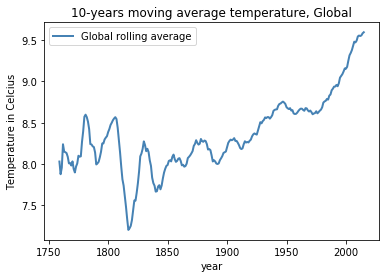

In [24]:
sb.lineplot(x = "year", y = "rollingAverage", data = global_data, label = "Global rolling average",color = "steelblue", lw = 2)
plt.title("10-years moving average temperature, Global")
plt.ylabel("Temperature in Celcius")

Text(0, 0.5, 'Temperature in Celcius')

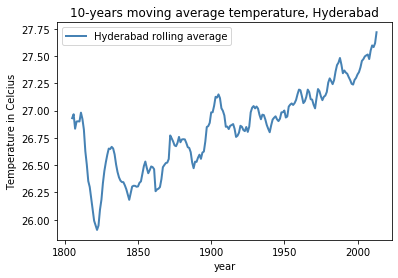

In [23]:
sb.lineplot(x = "year", y = "rollingAverage", data = hyderabad, label = "Hyderabad rolling average",color = "steelblue", lw = 2)
plt.title("10-years moving average temperature, Hyderabad")
plt.ylabel("Temperature in Celcius")

#### Plotting moving average for both the graphs after the year 1800.

Text(0, 0.5, 'Temperature in Celcius')

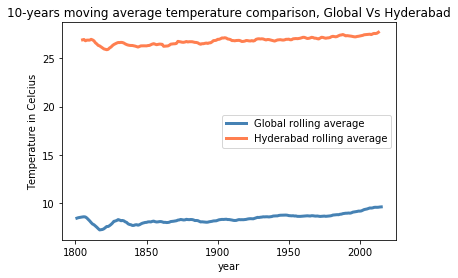

In [22]:
sb.lineplot(x = (global_data.year[global_data.year >1800]), y = "rollingAverage", data = global_data, label = "Global rolling average",color = "steelblue", lw = 3)
sb.lineplot(x = "year", y = "rollingAverage", data = hyderabad, label = "Hyderabad rolling average",color = "coral", lw = 3)
plt.title("10-years moving average temperature comparison, Global Vs Hyderabad")
plt.ylabel("Temperature in Celcius")

### STEP 5. Data Exploration

In [ ]:
(global_data[global_data.year <1800]).describe()

In [ ]:
global_data.corr()

In [ ]:
hyderabad.corr()

In [ ]:
sb.regplot(data=hyderabad,x='year',y="avg_temp")

In [ ]:
sb.regplot(data=global_data,x='year',y="avg_temp")

In [ ]:
global_data[global_data.avg_temp==global_data.avg_temp.min()]

In [ ]:
#After year 1796
g=global_data[global_data.year>1795]
g[g.avg_temp==g.avg_temp.min()]

In [ ]:
global_data[global_data.year==1862]

In [ ]:
hyderabad[hyderabad.rollingAverage==hyderabad.rollingAverage.min()]

In [ ]:
global_data[global_data.rollingAverage==global_data.rollingAverage.min()]

##### DIFFERENCE IN TEMPERATURE (YEAR >1796) 
MERGING TWO DATASET

In [56]:
hyd_glob=pd.merge(hyderabad,global_data,on="year")


In [57]:
hyd_glob.rename(columns={"avg_temp_x":"avg_temp_hyd","rollingAverage_x":"rollingAverage_hyd","avg_temp_y":"avg_temp_glob","rollingAverage_y":"rollingAverage_glob"},inplace=True)


In [58]:
hyd_glob["diff_temp"]=hyd_glob.avg_temp_hyd - hyd_glob.avg_temp_glob



In [63]:
hyd_glob.describe()

,year,avg_temp_hyd,rollingAverage_hyd,avg_temp_glob,rollingAverage_glob,diff_temp
count,218.000000,218.000000,209.000000,218.000000,218.000000,218.000000
mean,1904.500000,26.861564,26.839856,8.403532,8.376881,18.458032
std,63.075352,0.533463,0.379773,0.548662,0.462554,0.401962
min,1796.000000,24.380000,25.906000,6.860000,7.203000,16.820000
25%,1850.250000,26.562500,26.532000,8.092500,8.075750,18.250000
50%,1904.500000,26.861564,26.865000,8.415000,8.295500,18.460000
75%,1958.750000,27.220000,27.105000,8.727500,8.653500,18.687500
max,2013.000000,28.850000,27.719000,9.730000,9.556000,20.001564


In [65]:
average=hyd_glob.avg_temp_hyd.mean()-hyd_glob.avg_temp_glob.mean()
average

18.458031870950922

In [80]:
global_inc=(hyd_glob.avg_temp_glob)[len(hyd_glob.avg_temp_glob)-1]-(hyd_glob.avg_temp_glob)[0]
global_inc

1.3399999999999999

In [82]:
hyd_inc=(hyd_glob.avg_temp_hyd)[len(hyd_glob.avg_temp_hyd)-1]-(hyd_glob.avg_temp_hyd)[0]
hyd_inc

2.3200000000000003

### OBSERVATIONS (Considering Year >1795)
#### Q1. Is your city hotter or cooler on average compared to the global average? Has the difference been consistent over time?
Answer: The is city is hotter on average compared to the global average.The average difference difference is 18.4580 and the least difference between the temperature is of 16.82.
#### Q2. How do the changes in your city’s temperatures over time compare to the changes in the global average?”
Answer: The overall change in global temperature is of 1.339. On the other hand the overall change for hyderabad is 2.320.
#### Q3. What does the overall trend look like? Is the world getting hotter or cooler? Has the trend been consistent over the last few hundred years?
Answer: Looking at the overall trend we can say that the average temp is increasing, the world is getting hotter. 

#### OTHER OBSERVATIONS

**In year 1862 hyderabad had lowest avg temperature of 24.38 and the global temperature was 7.56.**

**Considering the 10year moving average Hyderabad in year 1822 had lowest 10 year moving average 25.906 whereas from global temperature it was in year 1817.**

**There is positive correlation between year and avg_temp for both global and hyderabad. Therefore with each passing year the temperature is tend to increase unless some major action is taken.**

**The overall change in temperature for Hyderabad is more than that of change in Global temperature. Therefore we can say that the change observe in temperature of Hyderabad is slightly higher than that of Global**